In [74]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import thinkstats2
import thinkplot

In [3]:
house=pd.read_csv("Housing_Modified.csv")

In [4]:
house.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no


In [24]:
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()
house.driveway = lb.fit_transform(house.driveway)
house.recroom = lb.fit_transform(house.recroom)
house.fullbase = lb.fit_transform(house.fullbase)
house.gashw = lb.fit_transform(house.gashw)
house.airco = lb.fit_transform(house.airco)
house.prefarea = lb.fit_transform(house.prefarea)
house.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0


In [25]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null object
driveway    546 non-null int32
recroom     546 non-null int32
fullbase    546 non-null int32
gashw       546 non-null int32
airco       546 non-null int32
garagepl    546 non-null int64
prefarea    546 non-null int32
dtypes: float64(1), int32(6), int64(4), object(1)
memory usage: 38.5+ KB


In [26]:
house.isnull().any()

price       False
lotsize     False
bedrooms    False
bathrms     False
stories     False
driveway    False
recroom     False
fullbase    False
gashw       False
airco       False
garagepl    False
prefarea    False
dtype: bool

In [66]:
house['price'].value_counts().sort_index()

25000.0     3
25245.0     1
26000.0     1
26500.0     1
27000.0     2
28000.0     1
30000.0     3
30500.0     1
31900.0     1
32000.0     1
32500.0     3
33000.0     1
33500.0     1
34000.0     3
34400.0     1
35000.0     6
35500.0     2
36000.0     3
37000.0     3
37200.0     1
37900.0     2
38000.0     7
38500.0     1
39000.0     2
40000.0     2
40500.0     3
40750.0     1
41000.0     4
42000.0     8
42300.0     1
           ..
113000.0    1
113750.0    1
114000.0    1
114900.0    1
115442.0    1
116000.0    1
117000.0    1
118500.0    1
120000.0    5
120900.0    1
122000.0    1
122500.0    1
123500.0    2
124000.0    1
125000.0    1
126500.0    1
127000.0    1
128000.0    1
130000.0    2
132000.0    2
133000.0    1
138300.0    1
140000.0    2
141000.0    1
145000.0    2
155000.0    1
163000.0    1
174500.0    1
175000.0    2
190000.0    1
Name: price, Length: 219, dtype: int64

In [27]:
house['price'].describe()

count       546.000000
mean      68121.597070
std       26702.670926
min       25000.000000
25%       49125.000000
50%       62000.000000
75%       82000.000000
max      190000.000000
Name: price, dtype: float64

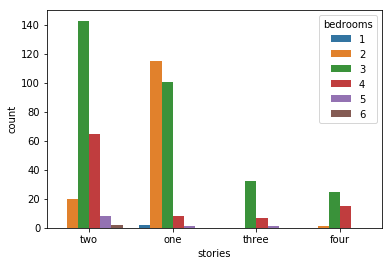

In [32]:
sns.countplot(house['stories'],hue=house['bedrooms'])

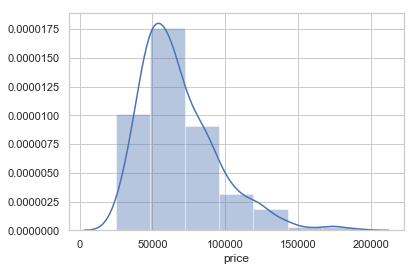

In [76]:
sns.distplot(house['price'],bins=7)


In [82]:
print("Skewness: %f" % house['price'].skew())

Skewness: 1.209829


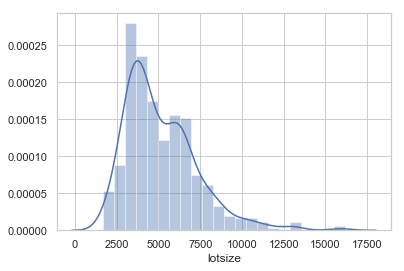

In [68]:
sns.distplot(house['lotsize']);

In [81]:
print("Skewness: %f" % house['lotsize'].skew())

Skewness: 1.322758


In [29]:
house2=house[house['stories']=='two']
house2.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
6,66000.0,3880,3,2,two,1,0,1,0,0,2,0
12,27000.0,1700,3,1,two,1,0,0,0,0,0,0
16,40500.0,3300,3,1,two,0,0,0,0,0,1,0


In [30]:
house2['bedrooms'].value_counts()

3    143
4     65
2     20
5      8
6      2
Name: bedrooms, dtype: int64

In [31]:
house2_price=house2['price']
mean,std=house2_price.mean(),house2_price.std()
mean, std

(68058.19327731093, 27510.030508498538)

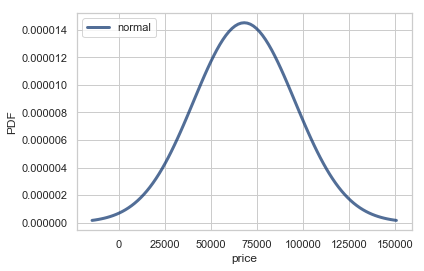

In [69]:
pdf = thinkstats2.NormalPdf(mean, std)
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='price', ylabel='PDF')

In [70]:
pmf = pdf.MakePmf()

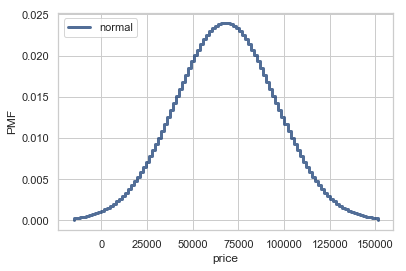

In [71]:
thinkplot.Pmf(pmf, label='normal')
thinkplot.Config(xlabel='price', ylabel='PMF')

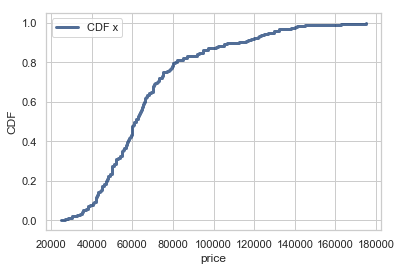

In [72]:
cdf = thinkstats2.Cdf(house2_price, label='CDF x')
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='price', ylabel='CDF', loc='upper left')

In [16]:
print("Skewness: %f" % house['price'].skew())

Skewness: 1.209829


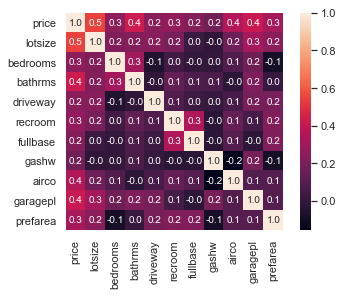

In [79]:
sns.heatmap(house2.corr(),square=True,annot=True,fmt='.1f')

Text(0.5, 1.0, 'preffered area')

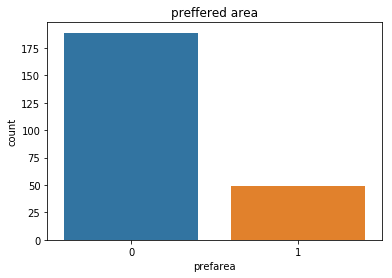

In [35]:
sns.countplot(x=house2['prefarea'])
plt.title('preffered area')

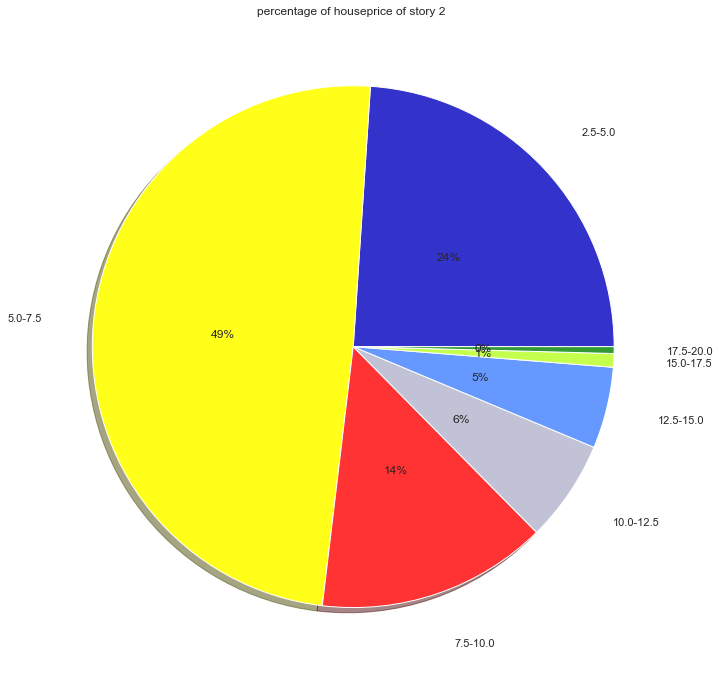

In [51]:
slices=[
((house2['price']>=25000) & (house2['price']<50000)).sum(),
((house2['price']>=50000) & (house2['price']<75000)).sum(),
((house2['price']>=75000) & (house2['price']<100000)).sum(),
((house2['price']>=100000) & (house2['price']<125000)).sum(),
((house2['price']>=125000) & (house2['price']<150000)).sum(),
((house2['price']>=150000) & (house2['price']<175000)).sum(),
((house2['price']>=175000) & (house2['price']<200000)).sum()]
labels=['2.5-5.0','5.0-7.5','7.5-10.0','10.0-12.5','12.5-15.0','15.0-17.5','17.5-20.0']
colors = ['#3333cc','#ffff1a','#ff3333','#c2c2d6','#6699ff','#c4ff4d','#339933']
plt.pie(slices,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=.5, labeldistance=1.2,shadow=True)
fig = plt.gcf()
plt.title("percentage of houseprice of story 2 ", bbox={'facecolor':'2', 'pad':5})

fig.set_size_inches(12,12)
plt.show()

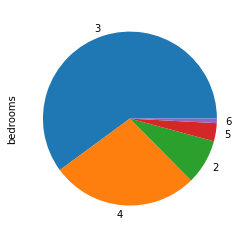

In [45]:
house2['bedrooms'].value_counts().plot.pie();

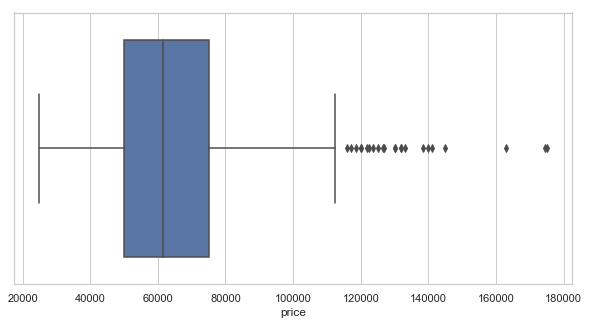

In [46]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(house2['price'])
plt.show()

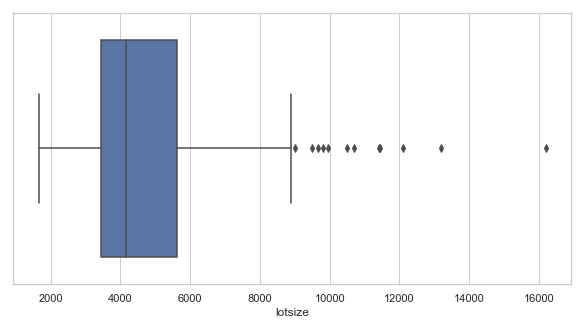

In [47]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(house2['lotsize'])
plt.show()

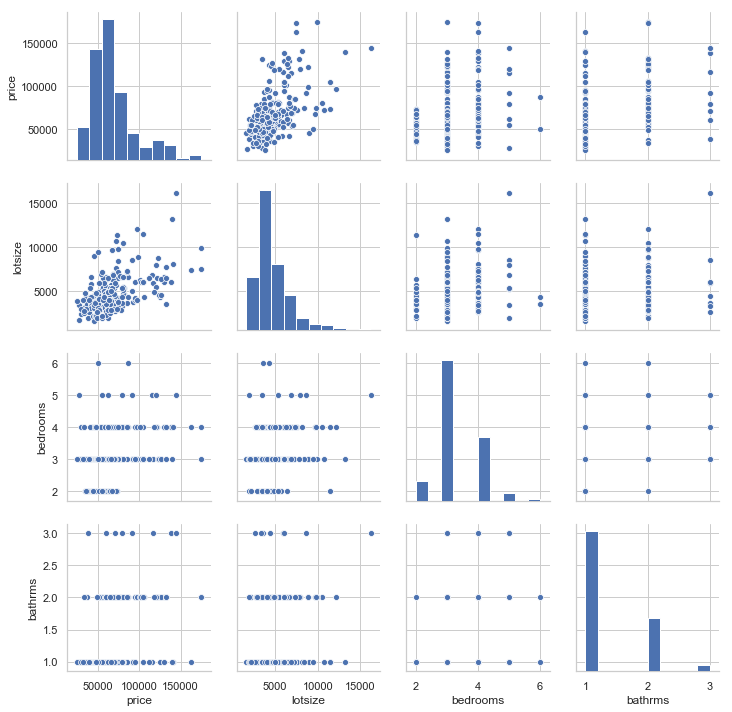

In [83]:
sns.pairplot(data=house2[['price', 'lotsize', 'bedrooms', 'bathrms']])

In [62]:
house_lotsize=house2['bathrms'].value_counts()

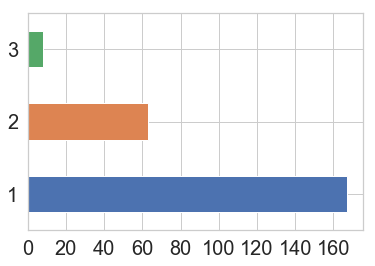

In [63]:
house_lotsize.plot(kind="barh",fontsize=20)

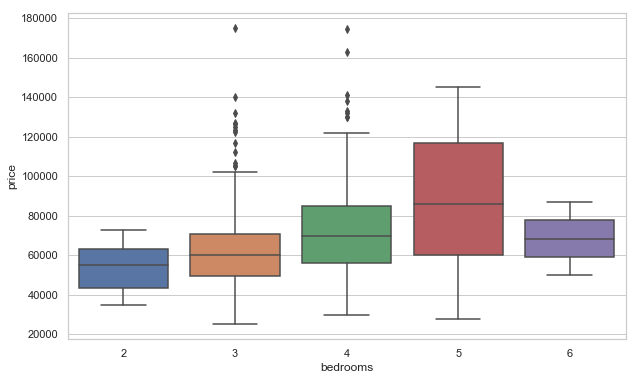

In [80]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='bedrooms', y='price', data=house2)